### import necesary libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

### Load the dataset

In [2]:
data=pd.read_csv("Salary_Data.csv")

In [4]:
data

,YearsExperience,Salary
0,1.1,39343.0
1,1.3,46205.0
2,1.5,37731.0
3,2.0,43525.0
4,2.2,39891.0
5,2.9,56642.0
6,3.0,60150.0
7,3.2,54445.0
8,3.2,64445.0
9,3.7,57189.0


In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30 entries, 0 to 29
Data columns (total 2 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   YearsExperience  30 non-null     float64
 1   Salary           30 non-null     float64
dtypes: float64(2)
memory usage: 612.0 bytes


In [6]:
data.shape

(30, 2)

In [7]:
data.describe()

,YearsExperience,Salary
count,30.000000,30.000000
mean,5.313333,76003.000000
std,2.837888,27414.429785
min,1.100000,37731.000000
25%,3.200000,56720.750000
50%,4.700000,65237.000000
75%,7.700000,100544.750000
max,10.500000,122391.000000


### Handling null values

In [8]:
data.isnull().any()

YearsExperience    False
Salary             False
dtype: bool

In [9]:
data.isnull().sum()

YearsExperience    0
Salary             0
dtype: int64

In [10]:
data.head()

,YearsExperience,Salary
0,1.1,39343.0
1,1.3,46205.0
2,1.5,37731.0
3,2.0,43525.0
4,2.2,39891.0


### Seperation of dependent and independent variables

In [11]:
#independent variable should be a 2d array or dataframe
X=data.iloc[:,:1]

In [12]:
type(X)

pandas.core.frame.DataFrame

In [13]:
X.head()

,YearsExperience
0,1.1
1,1.3
2,1.5
3,2.0
4,2.2


In [14]:
#dependent variable should be a series or 1 d array
y=data["Salary"]

In [15]:
type(y)

pandas.core.series.Series

In [16]:
y.head()

0    39343.0
1    46205.0
2    37731.0
3    43525.0
4    39891.0
Name: Salary, dtype: float64

Text(0, 0.5, 'y')

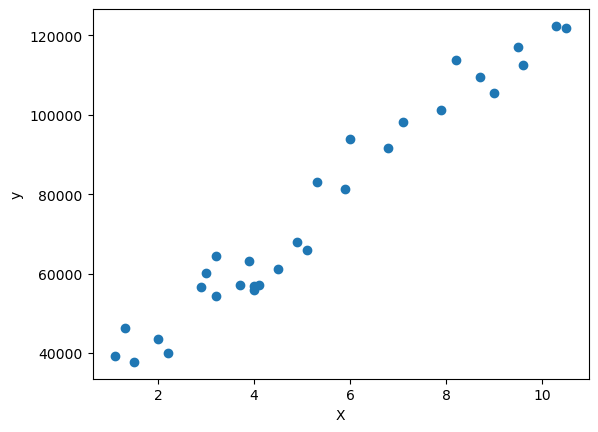

In [17]:
plt.scatter(X,y)
plt.xlabel("X")
plt.ylabel("y")

### Train test split

In [18]:
from sklearn.model_selection import train_test_split

In [19]:
x_train,x_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=0)

In [20]:
x_train

,YearsExperience
27,9.6
11,4.0
17,5.3
22,7.9
5,2.9
16,5.1
8,3.2
14,4.5
23,8.2
20,6.8


In [21]:
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(24, 1)
(6, 1)
(24,)
(6,)


### Model Building

In [23]:
from sklearn.linear_model import LinearRegression

In [24]:
lr=LinearRegression()

In [25]:
lr.fit(x_train,y_train)

LinearRegression()

In [27]:
lr.coef_

array([9312.57512673])

In [28]:
lr.intercept_

26780.09915062818

### Test the model



In [29]:
y_pred=lr.predict(x_test)

In [30]:
y_pred

array([ 40748.96184072, 122699.62295594,  64961.65717022,  63099.14214487,
       115249.56285456, 107799.50275317])

In [31]:
y_test

2      37731.0
28    122391.0
13     57081.0
10     63218.0
26    116969.0
24    109431.0
Name: Salary, dtype: float64

### Evaluation of model

In [32]:
from sklearn.metrics import r2_score
r2_score(y_test,y_pred)

0.988169515729126

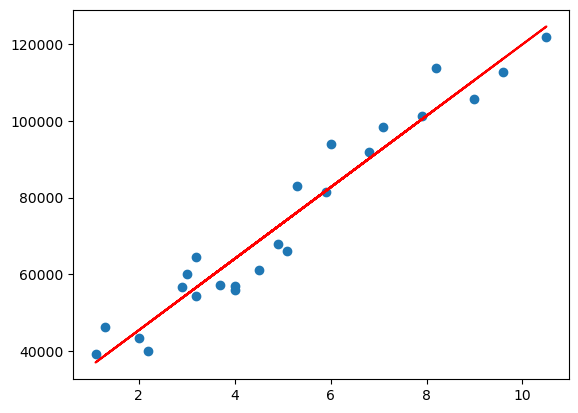

In [33]:
plt.scatter(x_train,y_train)
plt.plot(x_train,lr.predict(x_train),color="red")

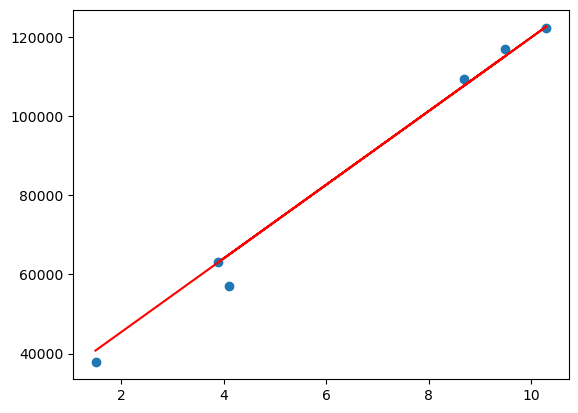

In [34]:
plt.scatter(x_test,y_test)
plt.plot(x_test,lr.predict(x_test),color="red")

In [35]:
lr.predict([[8]])

C:\Users\shrey\anaconda3\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([101280.70016446])